## **04-1) 로지스틱 회귀**

로지스틱 회귀 알고리즘을 배우고 이진 분류 문제에서 클래스 확률을 예측한다.

#### **용어 정리**
- **로지스틱 회귀**: 선형방적식을 사용한 분류 알고리즘. 선형회귀와 달리 시그모이드 함수나 소프트맥스 함수를 사용하여 클래스 확률을 출력할 수 있다.
- **다중 분류**: 타깃 클래스가 2개 이상인 분류 문제. 로지스틱 회귀는 다중 분류를 위해 소프트맥스 함수를 사용하여 클래스를 예측한다.
- **시그모이드 함수**: 선형방적식의 출력을 0과 1사이 값으로 압축하며 이진 분류를 위해 사용한다.
- **소프트맥스 함수**: 다중 분류에서 여러 선형방정식의 출력 결과를 정규화하여 합이 1이 되도록 만든다.

### **럭키백의 확률**

럭키백에 담긴 7개의 생선이 어떤 생선인지 확률을 예측해야 한다!<br>
분류 모델은 예측뿐만 아니라 예측의 근거가 되는 확률을 출력할 수 있다.<br>
 이 확률은 분류 모델이 얼마나 예측을 확신하는지 나타낸다고 볼 수 있다. 확률이 높을수록 강하게 예측하는 셈인 것이다.

먼저 **k-최근접 이웃 분류기**로 럭키백에 들어간 생선의 확률을 계산해보자.<br>
k-최근접 이웃은 주변 이웃을 찾아주니, 이웃의 클래스 비율을 확률이라고 출력하면 될 듯하다.

#### **데이터 준비**

In [1]:
import pandas as pd

# csv 파일을 데이터프레임으로 변환
fish = pd.read_csv('https://bit.ly/fish_csv_data')
# 처음 5개 행 출력
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


그럼 어떤 종류의 생선이 있는지 Species 열에서 고유한 값을 추출해 보자. 

In [2]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


이 데이터프레임에서 Species 열을 타깃으로 만들고, 나머지 5개 열은 입력 데이터로 사용할 것이다. <br>
데이터프레임에서 원하는 열을 리스트로 나열하면 열을 선택할 수 있다.

In [3]:
# 괄호 두 개 ~> 2차원 배열
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
# 처음 5개 행 출력
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


동일한 방식으로 타깃 데이터를 만들어보자.

In [4]:
# 타깃 데이터는 1차원 배열
fish_target = fish['Species'].to_numpy()

이제 데이터를 훈련 세트와 테스트 세트로 나눈다.

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target ,test_target = train_test_split(fish_input, fish_target, random_state=42)

그다음 사이킷런의 StandardScaler 클래스를 사용하여 훈련 세트와 테스트 세트를 표준화 전처리 한다.<br>
**훈련 세트의 통계 값으로 테스트 세트를 변환해야 한다는 것**을 잊지 말자.

In [6]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

<br>

#### **k-최근접 이웃 분류기의 확률 예측**

필요한 데이터를 모두 준비했으니 이제 k-최근접 이웃 분류기로 테스트 세트에 들어있는 확률을 예측해보자.<br>

사이킷런의 KNeighborsClassifier 클래스 객체를 만들고 훈련 세트로 모델을 훈련한 다음 훈련 세트와 테스트 세트의 점수를 확인한다. <br>
최근접 이웃 개수는 3으로 지정한다.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


이진 분류를 사용했을 때는 양성 클래스와 음성 클래스를 각각 1, 0으로 지정하여 타깃데이터를 만들었다.<br>
**다중 분류**에서도 타깃값을 숫자로 바꿔 입력할 수 있지만 사이킷런에서는 문자열로 된 타깃값을 그대로 사용할 수 있다. <br>
이때 타깃값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순으로 정렬된다. 정렬된 타깃값은 **`classes_`** 속성에 저장되어 있다.

In [9]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


테스트 세트에 있는 처음 5개 샘플의 타깃값을 예측해 보겠다. 
predict() 메서드는 타깃값으로 예측을 해준다.

In [10]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


그럼 이 5개 샘플에 대한 예측은 어떤 확률로 만들어졌는지 확인하기 위해 사이킷런의 **predict_proba()** 메서드를 사용해보자.<br>
predict_proba() 메서드는 클래스별 확률값을 반환하며, 출력 순서는 classes_ 속성과 같다.


In [11]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) # 소수점 네 번째 자리까지 표기됨(다섯 번째 자리에서 반올림)

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인해 보자.<br>
네 번째 샘플의 최근접 이웃의 클래스를 확인해볼 것이다.

In [12]:
# kneighbors()의 인풋은 2차원 배열이어야 함.
# 슬라이싱 연산자 ~> 샘플 하나만 선택해도 항상 2차원 배열이 만들어짐
distances, indexes = kn.kneighbors(test_scaled[3:4]) # 네 번째 샘플 선택
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


이 샘플의 이웃은 다섯 번째 클래스인 'Roach'가 1개, 세 번째 클래스인 'Perch'가 2개이다.<br> 따라서 Roach에 대한 확률은 1/3=0.3333이고, Perch에 대한 확률은 2/3=0.6667이 되므로, 앞서 출력한 네 번째 샘플의 클래스 확률과 같다.

그러나 k-최근접 이웃 모델이 확률을 출력할 수는 있지만 이웃한 샘플의 클래스 비율이므로 항상 정해진 확률만 출력하게 된다.<br> 우리는 럭키백에 더 걸맞는, 고객이 어느 정도 생선을 예상할 수 있지만 상품마다 좀 더 그럴싸한 확률을 표시하고 싶다.

### **로지스틱 회귀**

로지스틱 회귀는 이름만 회귀이고 분류 모델이다.<br>
이 알고리즘은 선형 회귀와 동일하게 선형 방정식을 학습한다. 하지만 계산한 값을 그대로 출력하는 것이 아니라 이 값을 0 ~ 1 사이로 압축한다.<br>
이 값은 0 ~100% 사이의 확률로 이해할 수 있다.

#### **로지스틱 회귀로 이진 분류 수행하기**

로지스틱 회귀는 이진 분류에서는 하나의 선형 방정식을 훈련한다. 이 방정식의 출력값을 **시그모이드 함수**에 통과시켜 0 ~ 1 사이의 값을 만든다. 이 값이 양성 클래스에 대한 확률이다. 음성 클래스의 확률은 1에서 양성 클래스의 확률을 빼면 된다.

넘파이를 사용해 시그모이드 그래프를 그려보자. -5와 5 사이에 0.1 간격으로 배열 z를 만든 다음, z 위치마다 시그모이드 함수를 계산한다. 지수 함수 계산은 `np.exp()` 함수를 사용한다.

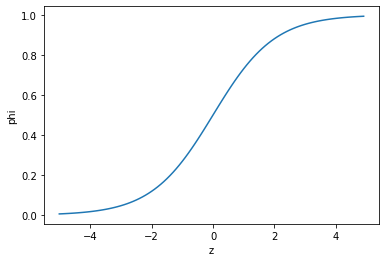

In [14]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)  
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

시그모이드 함수의 출력이 정말 0에서 1까지 변하는 것을 확인할 수 있다.<br>
그럼 로지스틱 회귀로 간단한 이진 분류를 수행해보자. 사이킷런의 `LogisticRegression` 클래스를 사용하면 된다.

+) **불리언 인덱싱**<br>
넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있다.<br>
```
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]]  # ['A', 'C']가 출력됨
```

불리언 인덱싱을 사용하여 훈련 세트에서 도미(Bream)와 빙어(Smelt)의 행만 골라낼 것이다. 

In [16]:
# Bream, Smelt인 것만 True, 나머지는 False인 배열을 반환한다.
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

이 데이터로 로지스틱 회귀 모델을 훈련해보자.

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

훈련한 모델을 사용해 train_bream_smelt에 있는 처음 5개 샘플을 예측해보자.

In [18]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


두 번째 샘플을 제외하고는 모두 도미로 예측했다.<br>
마찬가지로 train_bream_smelt에서 처음 5개 샘플의 예측 확률을 출력해보겠다.

In [19]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


첫 번째 열이 음성 클래스(0)에 대한 확률이고 두 번째 열이 양성 클래스(1)에 대한 확률이다. 

In [20]:
print(lr.classes_)

['Bream' 'Smelt']


앞서 봤듯이 사이킷런은 타깃값을 알파벳순으로 정렬하기 때문에 빙어가 양성 클래스가 된다.<br>
predict_proba() 메서드가 반환한 배열 값을 보면 두 번째 샘플만 양성 클래스인 빙어의 확률이 높고, 나머지는 모두 도미의 확률이 높은 것을 보니 성공적으로 이진 분류가 수행됐다.

그럼 선형 회귀에서처럼 로지스틱 회귀가 학습한 계수를 확인해보자.

In [21]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


따라서 이 로지스틱 회귀 모델이 학습한 방정식은 다음과 같다.<br>
$$z = -0.404*(Weight) - 0.576*(Length) -0.663*(Diagonal) - 1.013*(Height) - 0.732*(Width) - 2.161$$

LogisticRegression 클래스의 `decision_function()` 메서드로 z값을 출력해보자.

In [23]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


이 값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있다. <br>
파이썬의 `사이파이(scipy)` 라이브러리의 **시그모이드 함수인 expit()**를 사용해 decisions 배열의 값을 확률로 변환해보자.

In [25]:
from scipy.special import expit

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


출력된 값이 predict_proba() 메서드 출력의 두 번째 열의 값과 동일하다.<br>
즉 decision_function() 메서드는 **양성 클래스에 대한 z값**을 반환하는 것을 알 수 있다.<br><br>

#### **로지스틱 회귀로 다중 분류 수행하기**


이진 분류의 경험을 바탕으로 7개의 생선을 분류하는 다중 분류를 수행해 볼 것이다.<br><br>
**다중 분류**일 경우에는 클래스 개수만큼 방정식을 훈련한다. 그다음 각 방정식의 출력값을 **소프트맥스 함수**를 통과시켜 전체 클래스에 대한 합이 항상 1이 되도록 만든다. 이 값을 각 클래스에 대한 확률로 이해할 수 있다.

LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용한다. 충분하게 훈련시키기 위해 반복 횟수를 1,000으로 지정하자.(max_iter=1000)

LogisticRegression 클래스는 기본적으로 릿지 회귀와 같이 **계수의 제곱을 규제**한다. <br>
이런 규제를 **L2 규제**라고 부르며, 릿지와 달리 **매개변수 C**로 규제를 제어한다.<br>
C는 alpha와 달리 작을수록 규제가 커지므로, 규제를 완화하기 위해 20으로 설정한다.(기본값 C=1)

다음 코드는 LogisticRegression 클래스로 다중 분류 모델을 훈련하는 코드이다.

In [26]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


테스트 세트의 처음 5개 샘플에 대한 예측을 출력해보자.

In [27]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


이번에는 테스트 세트의 처음 5개 샘플에 대한 예측 확률을 출력해볼 것이다.

In [28]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3)) # 출력 간소하기 위해 소수점 네 번째 자리에서 반올림

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


classes_ 속성에서 클래스 정보를 확인해보자.

In [29]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


첫 번째 샘플은 Perch를, 두 번째 샘플은 Smelt를 가장 높은 확률로 예측한 것을 알 수 있다.<br>
그럼 다중 분류일 경우 선형 방정식은 어떤 모습일까?<br>
coef_와 intercept_의 크기를 출력해보자.

In [30]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


이 데이터는 **5개의 특성을 사용**하므로 coef_ 배열의 열은 5개이다.
행이 7인 것은 **z를 7개나 계산**한다는 의미이다.<br> 다중 분류는 클래스마다 z값을 하나씩 계산한다. 당연히 가장 높은 z값을 출력하는 클래스가 예측 클래스가 된다.

또한, 다중 분류에서는 **소프트맥스 함수**를 사용하여 7개의 z값을 확률로 변환한다. <br>**소프트맥스 함수**는 여러 개의 선형 방정식의 출력값을 0 ~ 1 사이로 압축하고 전체 합이 1이 되도록 만든다. <br>이를 위해 지수함수를 사용하기 때문에 **정규화된 지수 함수**라고도 부른다.

소프트맥스의 계산 방식은 다음과 같다.
1. 먼저 7개의 z값의 이름을 $z1$ ~ $z7$이라고 붙인다.
2. $z1$ ~ $z7$까지 값을 사용해 지수 함수 e<sup>z1</sup> ~ e<sup>z7</sup>을 계산해 모두 더하고 e_sum이라 한다.
3. 그다음 e<sup>z1</sup> ~ e<sup>z7</sup>을 각각 e_sum으로 나눠주면 된다.

각 나눠준 값을 모두 더하면 1이 된다.

그럼 decision_function() 메서드로 z1 ~ z7까지의 값을 구한 다음 소프트맥스 함수를 사용해 확률로 바꿔보자.<br><br>
먼저 테스트 세트의 처음 5개 샘플에 대한 z1 ~ z7의 값을 구한다.

In [31]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


사이파이의 softmax() 함수를 임포트해 사용한다.<br>
axis 매개변수는 소프트맥스를 계산할 축을 지정한다. axis=1은 각 행, 즉 각 샘플에 대해 소프트맥스를 계산한다.<br> 만약 axis를 지정하지 않으면 배열 전체에 대해 소프트맥스를 계산한다.

In [32]:
 from scipy.special import softmax

 proba = softmax(decision, axis=1)
 print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


앞서 구한 proba 배열과 비교하면 결과가 정확히 일치한다.